In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

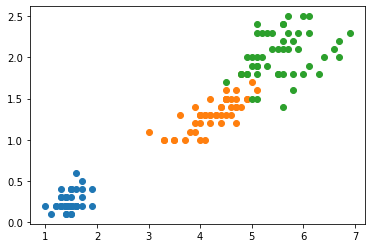

In [103]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

In [104]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [105]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100))
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custon_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0, x1, zz, cmap = custon_cmap)


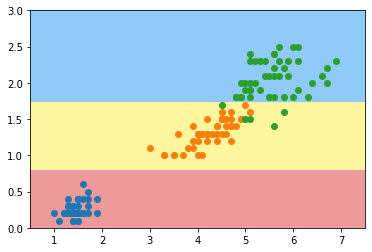

In [106]:
plot_decision_boundary(dt_clf, axis = [0.5, 7.5, 0, 3])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

[Text(133.92000000000002, 181.2, 'X[1] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

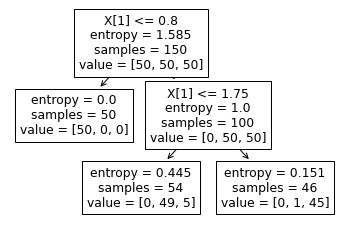

In [107]:
from sklearn import tree

tree.plot_tree(dt_clf)

In [ ]:
# Exercise 01:
There are 13 parameters of decision tree in sklearn  
**criterion:** there are two paramaters gini and entropy, and the function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.  
+ **entropy:** Information gain is biased to choosing attributes with a large number of values.If the data dimension is relatively large and the noise is large, the information gain algorithm is likely to lead to overfitting. The ID3 algorithm is using this method.
+ **GINI:** Since there is no need tot calculate the algorithm, the fitting time is slightly faster than the information entropy method.

**splitter:** The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.  
"best" method will branch according to feature_importances_ and may increase biase, "random" method will use a completely random method to cause the tree become bigger, it may lead to increased variance but this method prevent overfitting to a certain extent.

**max_depth:** The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.  
This paramater controls tree pruning, if this value is too large, it will lead to overfitting. This method may increase the variance of the results.

**min_samples_split:** The minimum number of samples required to split an internal node:
+ If int, then consider min_samples_split as teh minimum number.
+ If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
If the value of min_samples_split is small will lead to overfitting

**min_samples_leaf:** The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samplesin each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
+ If int, then consider min_samples_split as teh minimum number.
+ If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
This paramater is very sililar to the previous one.


**min_weigh_fraction_leaf:**The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
The effect of this parameter is similar to class_weight.

**max_features:**The number of features to consider when looking for the best split:
+ If int, then consider max_features features at each split.
+ If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
+ If “auto”, then max_features=sqrt(n_features).
+ If “sqrt”, then max_features=sqrt(n_features).
+ If “log2”, then max_features=log2(n_features).
+ If None, then max_features=n_features.
Forcibly setting this paramater may lead to insufficient model learning and increase variance. We can use with PCA to reduce dimension.

**random_state:**Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. See Glossary for details.
This paramater has random influence on results.

**max_leaf_nodes:**Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

**min_impurity_decrease:**A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

**min_impurity_split:**Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
The above two parameters are used for tree pruning.

**class_weight:**Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
We use this paramater to balance the sample labels, given more weight to a small number of labels, and make the model more biased to the minority class. It can reduce the biase of the results, only if we set the class_weight is suitable.


**ccp_alpha:**Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.



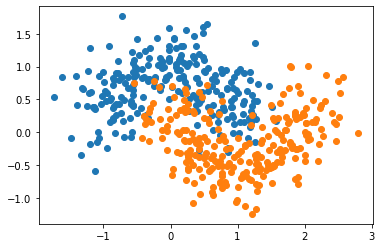

In [109]:
X, y = datasets.make_moons(n_samples=500, noise = 0.3, random_state = 42)
plt.scatter(X[y == 0, 0],X[y == 0, 1])
plt.scatter(X[y == 1, 0],X[y == 1, 1])
plt.show()

In [110]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=300,
    max_samples=300,
    bootstrap=True,
    oob_score=True
)
bagging_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=300,
                  n_estimators=300, oob_score=True)

In [111]:
bagging_clf.oob_score
bagging_clf.oob_score_

0.912

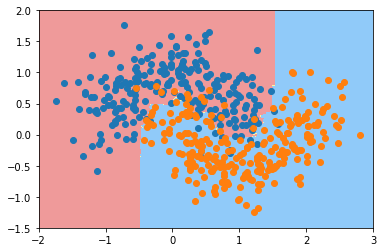

In [112]:
plot_decision_boundary(bagging_clf, axis = [-2, 3, -1.5, 2])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0],X[y == 1, 1])
plt.show()

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(
    n_estimators=300,
    random_state=666,
    oob_score=True
)
rf_clf.fit(X, y)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=666)

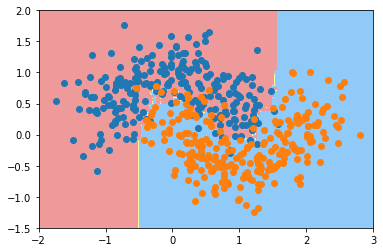

In [114]:
plot_decision_boundary(rf_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0],X[y == 1, 1])
plt.show()

# Exercise 2

There are 11 Parameters in BaggingClassifier.

**base_estimator: **The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a decision tree.
The result depends on the training method, generally default decision tree.

**n_estimators:** The number of base estimators in the ensemble.
The more n_estimators, the lower the variance of the overall model.

**max_samples:** The number of samples to draw from X to train each base estimator (with replacement by default, see `bootstrap` for more details).
- If int, then draw `max_samples` samples.
- If float, then draw `max_samples * X.shape[0]` samples.

If the parameter is too small, it will cause serious overfitting  and lead to high biase and variance.

**max_features:** The number of features to draw from X to train each base estimator ( without replacement by default, see `bootstrap_features` for more details).

- If int, then draw `max_features` features.
- If float, then draw `max_features * X.shape[1]` features.

Similar to the previous parameter.

**bootstrap:** Whether samples are drawn with replacement. If False, sampling without replacement is performed.

**bootstrap_features:**  Whether features are drawn with replacement.
Above two parameters may decrease the biased.

**oob_score:** Whether to use out-of-bag samples to estimate the generalization error.
If we set true, our sampling with 

**warm_start:** When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble. 

**n_jobs:** The number of jobs to run in parallel for both fit and predict. 
This paramater has no effect on the result.The evaluation results of multiple trainers on out-of-package instances are averaged to botain an integrated evaluaion.

**random_state:** Controls the random resampling of the original dataset (sample wise and feature wise). If the base estimator accepts a `random_state` attribute, a different seed is generated for each instance in the ensemble. Pass an int for reproducible output across multiple function calls. 
This paramater has random influence on results related to data set.

**verbose:** Controls the verbosity when fitting and predicting.
This paramater has no effect on the result.